# Reproducing Balaban Exp2 CDA Study (2019)

## Notes

In [13]:
import numpy as np
import glob
import pickle
import pandas as pd

import mne
from mne import Epochs, pick_channels, find_events
from mne.io import read_raw_bdf

import sys
#sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/')
sys.path.append('D:\\PhD\\CDA-review\\studies\\')
from cda_utils import get_epochs, get_CDA, prep_report, fill_report, get_report, checksum, add_cda_report, get_CDA_perf_report
#sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/Balaban-2019/')
sys.path.append('D:\\PhD\\CDA-review\\studies\\Balaban-2019\\')
from events import get_specific_events
 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load, Prep & CDA

In [15]:
#==================================================================
# General Variables
#==================================================================
study_id = 'Balaban2019-Exp2'

triggers = dict();

triggers['2_Integrated'] = [21] 
triggers['4_Integrated'] = [22]
triggers['Separated'] = [23]

triggers['left'] = [32]  #[31]
triggers['right'] = [31] #[32]

triggers['good'] = [50,60]   # YR: Why 2 triggers for good and 2 triggers for bad?!
triggers['bad'] = [5,6]

# Labels
conds = ['2_Integrated', '4_Integrated', 'Separated']
sides = ['left', 'right']
perfs = ['good', 'bad']

# Internal Triggers to Epochs Properly
internal_triggers = dict()
internal_triggers_count = 0
for cond in conds:
    for side in sides:
        for perf in perfs:
            internal_triggers_count = internal_triggers_count + 1
            internal_triggers['{}-{}-{}'.format(cond,side,perf)] = internal_triggers_count
            
# CDA Channels
chan_right = ['P8', 'PO8', 'PO4']
chan_left =  ['P7', 'PO7', 'PO3']

# Epoch Information
epoch_length = 1.7
epoch_tmin = -0.2
baseline_corr = (-0.2, 0)

# CDA info
cda_window = (0.8, 1.6)

# CDA main variable!
cda_dict_all = dict()
epochs_dict_all = dict()
perf_report_all = dict()
report = prep_report(conds, sides, perfs)


Processing: 514.bdf...
Extracting EDF parameters from /Users/nick/Documents/PhD/CDA Datasets/Balaban 2019/Data/Exp2_EEG/514.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 936703  =      0.000 ...  3658.996 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
['Fp1', 'AF3', 'F7', 'F3', 'P1', 'FCz', 'T7', 'C3', 'P5', 'PO7', 'P7', 'P3', 'POz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'PO8', 'P6', 'C4', 'T8', 'Fz', 'P2', 'F4', 'F8', 'AF4', 'Fp2', 'Cz', 'Pz', 'EXG7', 'EXG8', 'Status']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)


/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=1


  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

Dropped 4 epochs: 79, 152, 171, 668


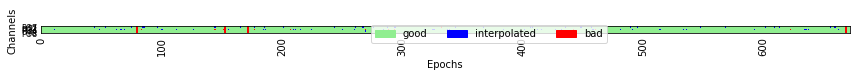

---------- 2_Integrated-left-good -------------
---------- 2_Integrated-left-bad -------------
---------- 2_Integrated-right-good -------------
---------- 2_Integrated-right-bad -------------
---------- 4_Integrated-left-good -------------
---------- 4_Integrated-left-bad -------------
---------- 4_Integrated-right-good -------------
---------- 4_Integrated-right-bad -------------
---------- Separated-left-good -------------
---------- Separated-left-bad -------------
---------- Separated-right-good -------------
---------- Separated-right-bad -------------
====================== /EPOCHING ======================
[514.bdf] Adding Mean CDA Amp for 2_Integrated-left-good: -1.5782404608056595
[514.bdf] Adding Mean CDA Amp for 2_Integrated-left-bad: -0.5767091785912241
[514.bdf] Adding Mean CDA Amp for 2_Integrated-right-good: 0.8012810974602244
[514.bdf] Adding Mean CDA Amp for 2_Integrated-right-bad: -0.4422544673293481
[514.bdf] Adding Mean CDA Amp for 4_Integrated-left-good: -2.51985737

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

Dropped 64 epochs: 0, 16, 53, 59, 65, 67, 97, 153, 162, 174, 191, 200, 208, 213, 221, 228, 240, 247, 259, 262, 282, 287, 298, 300, 301, 305, 306, 312, 329, 336, 338, 359, 371, 374, 406, 408, 419, 424, 425, 439, 447, 460, 489, 495, 496, 503, 513, 532, 553, 557, 560, 567, 570, 588, 590, 619, 632, 639, 645, 648, 651, 656, 657, 662


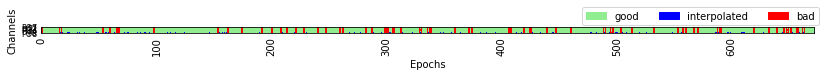

---------- 2_Integrated-left-good -------------
---------- 2_Integrated-left-bad -------------
---------- 2_Integrated-right-good -------------
---------- 2_Integrated-right-bad -------------
---------- 4_Integrated-left-good -------------
---------- 4_Integrated-left-bad -------------
---------- 4_Integrated-right-good -------------
---------- 4_Integrated-right-bad -------------
---------- Separated-left-good -------------
---------- Separated-left-bad -------------
---------- Separated-right-good -------------
---------- Separated-right-bad -------------
====================== /EPOCHING ======================
[515.bdf] Adding Mean CDA Amp for 2_Integrated-left-good: -1.2341518444341821
[515.bdf] Adding Mean CDA Amp for 2_Integrated-left-bad: -1.4533770956281995
[515.bdf] Adding Mean CDA Amp for 2_Integrated-right-good: -1.329681307863234
[515.bdf] Adding Mean CDA Amp for 2_Integrated-right-bad: -2.1434645862501696
[515.bdf] Adding Mean CDA Amp for 4_Integrated-left-good: -0.44799721

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/623 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/623 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/623 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/623 [00:00<?,       ?it/s]

/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/mne/bem.py:967: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=1


  0%|          | Repairing epochs : 0/623 [00:00<?,       ?it/s]

Dropped 117 epochs: 26, 27, 39, 46, 49, 52, 58, 67, 70, 71, 72, 79, 90, 91, 95, 97, 99, 107, 108, 114, 115, 117, 123, 136, 145, 148, 157, 159, 161, 166, 173, 176, 180, 182, 186, 187, 195, 197, 202, 203, 208, 219, 229, 237, 240, 246, 252, 270, 276, 278, 281, 284, 290, 291, 307, 308, 316, 331, 333, 334, 339, 343, 344, 350, 354, 362, 364, 370, 371, 375, 387, 398, 405, 413, 416, 417, 420, 423, 425, 428, 434, 447, 448, 450, 462, 463, 464, 467, 473, 474, 492, 517, 518, 526, 531, 539, 542, 548, 558, 561, 563, 564, 568, 574, 591, 597, 598, 600, 602, 603, 604, 607, 608, 609, 612, 614, 615


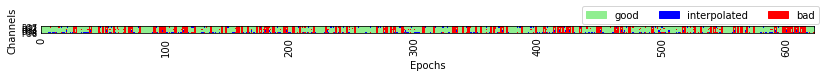

---------- 2_Integrated-left-good -------------
---------- 2_Integrated-left-bad -------------
---------- 2_Integrated-right-good -------------
---------- 2_Integrated-right-bad -------------
---------- 4_Integrated-left-good -------------
---------- 4_Integrated-left-bad -------------
---------- 4_Integrated-right-good -------------
---------- 4_Integrated-right-bad -------------
---------- Separated-left-good -------------
---------- Separated-left-bad -------------
---------- Separated-right-good -------------
---------- Separated-right-bad -------------
====================== /EPOCHING ======================
[501.bdf] Adding Mean CDA Amp for 2_Integrated-left-good: -1.8207818515154102
[501.bdf] Adding Mean CDA Amp for 2_Integrated-left-bad: -2.321554067243738
[501.bdf] Adding Mean CDA Amp for 2_Integrated-right-good: 0.3816202228600014
[501.bdf] Adding Mean CDA Amp for 2_Integrated-right-bad: 1.0618745833258076
[501.bdf] Adding Mean CDA Amp for 4_Integrated-left-good: -3.8120814149

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.90 and n_interpolate=1


  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


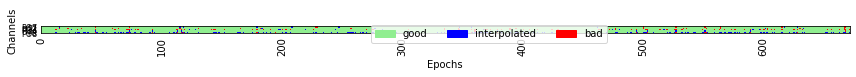

---------- 2_Integrated-left-good -------------
---------- 2_Integrated-left-bad -------------
---------- 2_Integrated-right-good -------------
---------- 2_Integrated-right-bad -------------
---------- 4_Integrated-left-good -------------
---------- 4_Integrated-left-bad -------------
---------- 4_Integrated-right-good -------------
---------- 4_Integrated-right-bad -------------
---------- Separated-left-good -------------
---------- Separated-left-bad -------------
---------- Separated-right-good -------------
---------- Separated-right-bad -------------
====================== /EPOCHING ======================
[517.bdf] Adding Mean CDA Amp for 2_Integrated-left-good: -1.134682877551785
[517.bdf] Adding Mean CDA Amp for 2_Integrated-left-bad: 0.453168849216718
[517.bdf] Adding Mean CDA Amp for 2_Integrated-right-good: -1.0451910351355151
[517.bdf] Adding Mean CDA Amp for 2_Integrated-right-bad: -1.420903330784614
[517.bdf] Adding Mean CDA Amp for 4_Integrated-left-good: -2.65738536760

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=1


  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


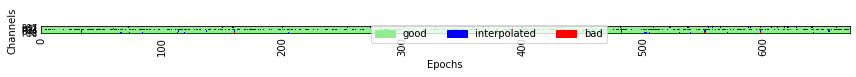

---------- 2_Integrated-left-good -------------
---------- 2_Integrated-left-bad -------------
---------- 2_Integrated-right-good -------------
---------- 2_Integrated-right-bad -------------
---------- 4_Integrated-left-good -------------
---------- 4_Integrated-left-bad -------------
---------- 4_Integrated-right-good -------------
---------- 4_Integrated-right-bad -------------
---------- Separated-left-good -------------
---------- Separated-left-bad -------------
---------- Separated-right-good -------------
---------- Separated-right-bad -------------
====================== /EPOCHING ======================
[503.bdf] Adding Mean CDA Amp for 2_Integrated-left-good: 0.7408018027839509
[503.bdf] Adding Mean CDA Amp for 2_Integrated-left-bad: 0.4283662891499671
[503.bdf] Adding Mean CDA Amp for 2_Integrated-right-good: -1.5138946648990241
[503.bdf] Adding Mean CDA Amp for 2_Integrated-right-bad: -1.4559390878475704
[503.bdf] Adding Mean CDA Amp for 4_Integrated-left-good: 1.5096931499

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/mne/bem.py:967: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=1


  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

Dropped 67 epochs: 3, 20, 39, 43, 52, 53, 63, 73, 79, 98, 101, 111, 117, 133, 158, 163, 168, 173, 181, 189, 192, 194, 203, 213, 214, 215, 255, 257, 272, 310, 330, 332, 333, 338, 339, 343, 350, 360, 380, 387, 389, 391, 432, 437, 481, 483, 494, 503, 505, 512, 515, 517, 529, 539, 542, 544, 545, 551, 594, 614, 622, 623, 625, 635, 645, 650, 667


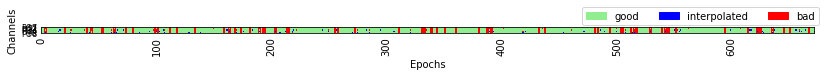

---------- 2_Integrated-left-good -------------
---------- 2_Integrated-left-bad -------------
---------- 2_Integrated-right-good -------------
---------- 2_Integrated-right-bad -------------
---------- 4_Integrated-left-good -------------
---------- 4_Integrated-left-bad -------------
---------- 4_Integrated-right-good -------------
---------- 4_Integrated-right-bad -------------
---------- Separated-left-good -------------
---------- Separated-left-bad -------------
---------- Separated-right-good -------------
---------- Separated-right-bad -------------
====================== /EPOCHING ======================
[502.bdf] Adding Mean CDA Amp for 2_Integrated-left-good: -1.273465046285532
[502.bdf] Adding Mean CDA Amp for 2_Integrated-left-bad: -1.714716773017829
[502.bdf] Adding Mean CDA Amp for 2_Integrated-right-good: -0.19406167477614125
[502.bdf] Adding Mean CDA Amp for 2_Integrated-right-bad: -0.6376795216463603
[502.bdf] Adding Mean CDA Amp for 4_Integrated-left-good: -2.28864982

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=1


  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


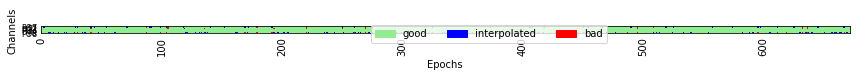

---------- 2_Integrated-left-good -------------
---------- 2_Integrated-left-bad -------------
---------- 2_Integrated-right-good -------------
---------- 2_Integrated-right-bad -------------
---------- 4_Integrated-left-good -------------
---------- 4_Integrated-left-bad -------------
---------- 4_Integrated-right-good -------------
---------- 4_Integrated-right-bad -------------
---------- Separated-left-good -------------
---------- Separated-left-bad -------------
---------- Separated-right-good -------------
---------- Separated-right-bad -------------
====================== /EPOCHING ======================
[516.bdf] Adding Mean CDA Amp for 2_Integrated-left-good: -0.5035404778534858
[516.bdf] Adding Mean CDA Amp for 2_Integrated-left-bad: -1.1458387420267602
[516.bdf] Adding Mean CDA Amp for 2_Integrated-right-good: -1.5960864048622643
[516.bdf] Adding Mean CDA Amp for 2_Integrated-right-bad: -1.2297697278262556
[516.bdf] Adding Mean CDA Amp for 4_Integrated-left-good: -0.4006592

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=1


  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


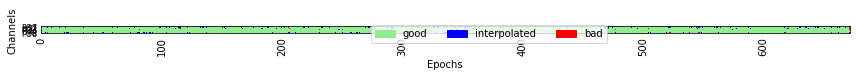

---------- 2_Integrated-left-good -------------
---------- 2_Integrated-left-bad -------------
---------- 2_Integrated-right-good -------------
---------- 2_Integrated-right-bad -------------
---------- 4_Integrated-left-good -------------
---------- 4_Integrated-left-bad -------------
---------- 4_Integrated-right-good -------------
---------- 4_Integrated-right-bad -------------
---------- Separated-left-good -------------
---------- Separated-left-bad -------------
---------- Separated-right-good -------------
---------- Separated-right-bad -------------
====================== /EPOCHING ======================
[512.bdf] Adding Mean CDA Amp for 2_Integrated-left-good: -0.29437927093921606
[512.bdf] Adding Mean CDA Amp for 2_Integrated-left-bad: -0.06588111848641134
[512.bdf] Adding Mean CDA Amp for 2_Integrated-right-good: -1.3815001203899324
[512.bdf] Adding Mean CDA Amp for 2_Integrated-right-bad: -1.6842573501903773
[512.bdf] Adding Mean CDA Amp for 4_Integrated-left-good: -1.87605

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/mne/bem.py:967: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=1


  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

Dropped 18 epochs: 1, 38, 131, 133, 166, 170, 274, 284, 309, 328, 401, 489, 580, 581, 632, 633, 641, 644


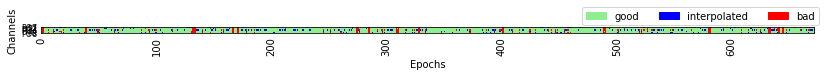

---------- 2_Integrated-left-good -------------
---------- 2_Integrated-left-bad -------------
---------- 2_Integrated-right-good -------------
---------- 2_Integrated-right-bad -------------
---------- 4_Integrated-left-good -------------
---------- 4_Integrated-left-bad -------------
---------- 4_Integrated-right-good -------------
---------- 4_Integrated-right-bad -------------
---------- Separated-left-good -------------
---------- Separated-left-bad -------------
---------- Separated-right-good -------------
---------- Separated-right-bad -------------
====================== /EPOCHING ======================
[506.bdf] Adding Mean CDA Amp for 2_Integrated-left-good: -1.652111626619596
[506.bdf] Adding Mean CDA Amp for 2_Integrated-left-bad: 0.6893164209842098
[506.bdf] Adding Mean CDA Amp for 2_Integrated-right-good: -0.6921685882768721
[506.bdf] Adding Mean CDA Amp for 2_Integrated-right-bad: -4.206827497491399
[506.bdf] Adding Mean CDA Amp for 4_Integrated-left-good: -1.1855084852

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

Dropped 20 epochs: 12, 25, 63, 90, 118, 150, 200, 235, 248, 391, 486, 513, 528, 529, 540, 545, 555, 630, 632, 635


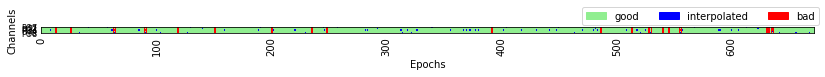

---------- 2_Integrated-left-good -------------
---------- 2_Integrated-left-bad -------------
---------- 2_Integrated-right-good -------------
---------- 2_Integrated-right-bad -------------
---------- 4_Integrated-left-good -------------
---------- 4_Integrated-left-bad -------------
---------- 4_Integrated-right-good -------------
---------- 4_Integrated-right-bad -------------
---------- Separated-left-good -------------
---------- Separated-left-bad -------------
---------- Separated-right-good -------------
---------- Separated-right-bad -------------
====================== /EPOCHING ======================
[507.bdf] Adding Mean CDA Amp for 2_Integrated-left-good: 0.5484980880636829
[507.bdf] Adding Mean CDA Amp for 2_Integrated-left-bad: -0.4349984778534647
[507.bdf] Adding Mean CDA Amp for 2_Integrated-right-good: -0.9855638869915844
[507.bdf] Adding Mean CDA Amp for 2_Integrated-right-bad: 0.12346239640445456
[507.bdf] Adding Mean CDA Amp for 4_Integrated-left-good: 0.497718166

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

Dropped 149 epochs: 8, 12, 14, 18, 25, 35, 37, 60, 61, 65, 68, 69, 70, 71, 75, 78, 81, 84, 93, 94, 95, 103, 106, 108, 112, 114, 118, 120, 121, 131, 134, 138, 144, 160, 163, 167, 168, 171, 172, 177, 178, 189, 190, 195, 199, 201, 202, 204, 209, 211, 213, 214, 215, 217, 224, 225, 235, 237, 240, 242, 243, 256, 263, 265, 275, 280, 283, 284, 285, 286, 301, 315, 322, 327, 330, 332, 338, 339, 340, 341, 355, 361, 363, 369, 371, 372, 375, 383, 385, 391, 393, 395, 397, 403, 407, 408, 420, 421, 438, 440, 448, 449, 454, 458, 465, 466, 474, 483, 489, 496, 504, 506, 508, 509, 510, 522, 530, 540, 542, 547, 558, 562, 574, 580, 591, 596, 599, 605, 609, 610, 611, 618, 623, 627, 629, 635, 637, 640, 641, 646, 647, 653, 657, 658, 659, 660, 661, 663, 665


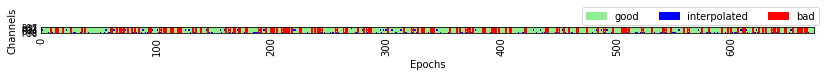

---------- 2_Integrated-left-good -------------
---------- 2_Integrated-left-bad -------------
---------- 2_Integrated-right-good -------------
---------- 2_Integrated-right-bad -------------
---------- 4_Integrated-left-good -------------
---------- 4_Integrated-left-bad -------------
---------- 4_Integrated-right-good -------------
---------- 4_Integrated-right-bad -------------
---------- Separated-left-good -------------
---------- Separated-left-bad -------------
---------- Separated-right-good -------------
---------- Separated-right-bad -------------
====================== /EPOCHING ======================
[505.bdf] Adding Mean CDA Amp for 2_Integrated-left-good: -3.5926454584158227
[505.bdf] Adding Mean CDA Amp for 2_Integrated-left-bad: -5.6522962673315655
[505.bdf] Adding Mean CDA Amp for 2_Integrated-right-good: 0.10768018445631687
[505.bdf] Adding Mean CDA Amp for 2_Integrated-right-bad: 0.7394049180280543
[505.bdf] Adding Mean CDA Amp for 4_Integrated-left-good: -6.37970198

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/mne/bem.py:967: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=1


  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

Dropped 95 epochs: 18, 43, 47, 51, 52, 56, 57, 58, 59, 60, 71, 86, 94, 97, 101, 112, 125, 137, 140, 142, 143, 162, 165, 166, 168, 175, 176, 178, 179, 184, 189, 197, 200, 205, 207, 209, 228, 241, 251, 253, 256, 262, 265, 281, 288, 299, 304, 305, 322, 327, 347, 356, 357, 366, 374, 376, 380, 381, 382, 384, 391, 401, 414, 415, 420, 427, 429, 439, 462, 473, 485, 494, 496, 498, 499, 505, 507, 525, 526, 527, 529, 533, 535, 544, 545, 547, 582, 589, 592, 599, 623, 628, 639, 659, 660


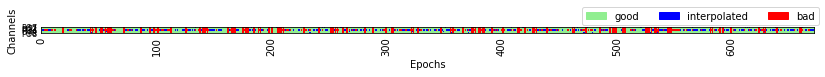

---------- 2_Integrated-left-good -------------
---------- 2_Integrated-left-bad -------------
---------- 2_Integrated-right-good -------------
---------- 2_Integrated-right-bad -------------
---------- 4_Integrated-left-good -------------
---------- 4_Integrated-left-bad -------------
---------- 4_Integrated-right-good -------------
---------- 4_Integrated-right-bad -------------
---------- Separated-left-good -------------
---------- Separated-left-bad -------------
---------- Separated-right-good -------------
---------- Separated-right-bad -------------
====================== /EPOCHING ======================
[511.bdf] Adding Mean CDA Amp for 2_Integrated-left-good: -0.7665503557142322
[511.bdf] Adding Mean CDA Amp for 2_Integrated-left-bad: -0.2481832179728745
[511.bdf] Adding Mean CDA Amp for 2_Integrated-right-good: -1.460127607973083
[511.bdf] Adding Mean CDA Amp for 2_Integrated-right-bad: -3.278335023083124
[511.bdf] Adding Mean CDA Amp for 4_Integrated-left-good: -0.571894243

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=1


  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

Dropped 2 epochs: 34, 587


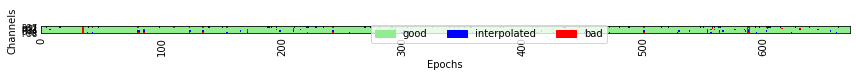

---------- 2_Integrated-left-good -------------
---------- 2_Integrated-left-bad -------------
---------- 2_Integrated-right-good -------------
---------- 2_Integrated-right-bad -------------
---------- 4_Integrated-left-good -------------
---------- 4_Integrated-left-bad -------------
---------- 4_Integrated-right-good -------------
---------- 4_Integrated-right-bad -------------
---------- Separated-left-good -------------
---------- Separated-left-bad -------------
---------- Separated-right-good -------------
---------- Separated-right-bad -------------
====================== /EPOCHING ======================
[510.bdf] Adding Mean CDA Amp for 2_Integrated-left-good: -0.7434215355144655
[510.bdf] Adding Mean CDA Amp for 2_Integrated-left-bad: -0.6714778960009627
[510.bdf] Adding Mean CDA Amp for 2_Integrated-right-good: -0.21456186806536423
[510.bdf] Adding Mean CDA Amp for 2_Integrated-right-bad: -0.7507870913390189
[510.bdf] Adding Mean CDA Amp for 4_Integrated-left-good: -0.071272

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.90 and n_interpolate=4


  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


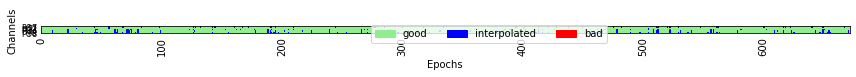

---------- 2_Integrated-left-good -------------
---------- 2_Integrated-left-bad -------------
---------- 2_Integrated-right-good -------------
---------- 2_Integrated-right-bad -------------
---------- 4_Integrated-left-good -------------
---------- 4_Integrated-left-bad -------------
---------- 4_Integrated-right-good -------------
---------- 4_Integrated-right-bad -------------
---------- Separated-left-good -------------
---------- Separated-left-bad -------------
---------- Separated-right-good -------------
---------- Separated-right-bad -------------
====================== /EPOCHING ======================
[504.bdf] Adding Mean CDA Amp for 2_Integrated-left-good: -1.2877464490087698
[504.bdf] Adding Mean CDA Amp for 2_Integrated-left-bad: -0.1974778747248081
[504.bdf] Adding Mean CDA Amp for 2_Integrated-right-good: -1.6301889275996835
[504.bdf] Adding Mean CDA Amp for 2_Integrated-right-bad: -0.7844844673708437
[504.bdf] Adding Mean CDA Amp for 4_Integrated-left-good: 0.29545485

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=1


  0%|          | Repairing epochs : 0/672 [00:00<?,       ?it/s]

Dropped 8 epochs: 83, 200, 203, 465, 510, 638, 667, 670


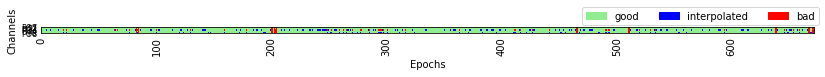

---------- 2_Integrated-left-good -------------
---------- 2_Integrated-left-bad -------------
---------- 2_Integrated-right-good -------------
---------- 2_Integrated-right-bad -------------
---------- 4_Integrated-left-good -------------
---------- 4_Integrated-left-bad -------------
---------- 4_Integrated-right-good -------------
---------- 4_Integrated-right-bad -------------
---------- Separated-left-good -------------
---------- Separated-left-bad -------------
---------- Separated-right-good -------------
---------- Separated-right-bad -------------
====================== /EPOCHING ======================
[509.bdf] Adding Mean CDA Amp for 2_Integrated-left-good: 0.8506108144281747
[509.bdf] Adding Mean CDA Amp for 2_Integrated-left-bad: 0.49236000216366604
[509.bdf] Adding Mean CDA Amp for 2_Integrated-right-good: -1.1895298705807185
[509.bdf] Adding Mean CDA Amp for 2_Integrated-right-bad: -3.2105646552704994
[509.bdf] Adding Mean CDA Amp for 4_Integrated-left-good: -0.65298091

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/591 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/591 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/591 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/591 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.90 and n_interpolate=4


  0%|          | Repairing epochs : 0/591 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


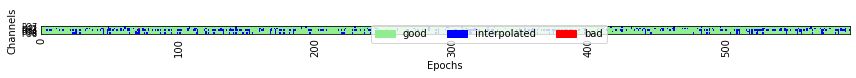

---------- 2_Integrated-left-good -------------
---------- 2_Integrated-left-bad -------------
---------- 2_Integrated-right-good -------------
---------- 2_Integrated-right-bad -------------
---------- 4_Integrated-left-good -------------
---------- 4_Integrated-left-bad -------------
---------- 4_Integrated-right-good -------------
---------- 4_Integrated-right-bad -------------
---------- Separated-left-good -------------
---------- Separated-left-bad -------------
---------- Separated-right-good -------------
---------- Separated-right-bad -------------
====================== /EPOCHING ======================
[508.bdf] Adding Mean CDA Amp for 2_Integrated-left-good: 0.7219983373598486
[508.bdf] Adding Mean CDA Amp for 2_Integrated-left-bad: 1.4316590320177793
[508.bdf] Adding Mean CDA Amp for 2_Integrated-right-good: -0.7199414577632285
[508.bdf] Adding Mean CDA Amp for 2_Integrated-right-bad: 2.0041850005299513
[508.bdf] Adding Mean CDA Amp for 4_Integrated-left-good: -0.0644396949

2_Integrated 4_Integrated Separated left right good  bad  \
514.bdf          220          241       211  331   341  470  202   
515.bdf          224          210       238  328   344  578   94   
501.bdf          218          217       188  319   304  426  197   
517.bdf          214          236       222  315   357  571  101   
503.bdf          239          212       221  326   346  516  156   
502.bdf          220          223       229  341   331  476  196   
516.bdf          226          226       220  340   332  509  163   
512.bdf          237          233       202  328   344  512  160   
506.bdf          223          234       215  348   324  551  121   
507.bdf          224          220       228  348   324  492  180   
505.bdf          242          211       219  319   353  547  125   
511.bdf          208          222       242  307   365  503  169   
510.bdf          237          209       226  366   306  492  180   
504.bdf          212          218       242  352   320  559  113   
509.bdf          218          234       220  313   359  538  134   
508.bdf          191          207       193  312   279  462  129   

        2_Integrated-left 2_Integrated-left-CDA 2_Integrated-left-good  ...  \
514.bdf               112                     0                     87  ...   
515.bdf               105                     0                     91  ...   
501.bdf               118                     0                     86  ...   
517.bdf               100                     0                     87  ...   
503.bdf               115                     0                     94  ...   
502.bdf               114                     0                     87  ...   
516.bdf               134                     0                    106  ...   
512.bdf               114                     0                     92  ...   
506.bdf               116                     0                    106  ...   
507.bdf               110                     0                     82  ...   
505.bdf               123                     0                    110  ...   
511.bdf                98                     0                     73  ...   
510.bdf               128                     0                     94  ...   
504.bdf               101                     0                     86  ...   
509.bdf                96                     0                     76  ...   
508.bdf               111                     0                     94  ...   

        Separated-right-good Separated-right-good-CDA right-good-CDA  \
514.bdf                   80                 0.520788       0.945304   
515.bdf                  108                -1.720047      -2.261183   
501.bdf                   73                 0.433412      -0.033373   
517.bdf                   93                -1.385189      -1.352952   
503.bdf                   94                -3.417124      -2.717071   
502.bdf                   96                 0.428106       0.294648   
516.bdf                   96                 -0.53916      -1.645759   
512.bdf                   87                -0.634589      -1.134993   
506.bdf                   81                -1.241515      -0.946185   
507.bdf                   83                -0.654125      -0.772377   
505.bdf                  114                 0.229013       0.706429   
511.bdf                  113                -1.415407      -1.479878   
510.bdf                   78                -1.477022      -1.570402   
504.bdf                   94                 -1.20801      -2.197868   
509.bdf                   99                 -2.00324      -1.410206   
508.bdf                   84                -1.495902      -0.945147   

        Separated-right-bad Separated-right-bad-CDA right-bad-CDA checksum  \
514.bdf                  32                1.353509       0.95809        0   
515.bdf                  13               -2.074223     -1.954619        0   
501.bdf                  18                1.341

In [2]:
#==================================================================
# Main Loop - Loading All Files & Extract CDAs.
#==================================================================
folderpath = '/Users/nick/Documents/PhD/CDA Datasets/Balaban 2019/Data/Exp2_EEG/'
#folderpath = 'D:\\CLNT\\Data\\Open Datasets\\Balaban 2019\\Data\\Exp2_EEG\\'
#filepath = folderpath + '536.bdf'
sep = '/'

for filepath in glob.iglob(folderpath + '*.bdf'):
    filename = filepath[filepath.rfind(sep)+1:]
    print('Processing: ' + filename + '...')
   
    # ------------------------
    # 1. -- Load File --
    # ------------------------
    raw = read_raw_bdf(filepath, preload=True)

    # ------------------------
    # 2. -- Preprocessing --
    # ------------------------
    # Keep only EEG channels and reference
    #raw = raw.rename_channels({'EXG7':'A1', 'EXG8': 'A2'})
    raw = raw.drop_channels(ch_names=['EXG1','EXG2','EXG3','EXG4','EXG5','EXG6'])
    raw = raw.set_eeg_reference(ref_channels=['EXG7', 'EXG8'])
    raw = raw.set_channel_types({'EXG7': 'misc', 'EXG8': 'misc'})

    print(raw.info.ch_names)
    
    # Set Electrodes Locations
    # It's 32 channels, but it seems like they didn't use the "standard" Biosemi 32
    montage = mne.channels.make_standard_montage('biosemi64')
    raw.set_montage(montage)
    
    preproc = raw
    
    # Filter
    preproc = preproc.filter(.1, 20., fir_design='firwin', skip_by_annotation='edge')

    # Events
    events = find_events(preproc)
        
    # Select Channels (to save time on cleaning)
    preproc = preproc.pick_channels(chan_right + chan_left)
    
    # Plot (visual check)
    #preproc.plot(events=events, block=True, lowpass=40)
    
    # ------------------------
    # 3. -- Epochs --
    # ------------------------
    specific_events = get_specific_events(events, conds, sides, perfs, triggers, internal_triggers)

    epochs_dict = get_epochs(preproc, specific_events, epoch_length, epoch_tmin, baseline_corr, clean=True)

    epochs_dict_all[filename] = epochs_dict
    
    # times, used for CDA mean amp report.
    times = epochs_dict[conds[0]][sides[0]][perfs[0]].times
    
    # ------------------------
    # 4. -- CDA --
    # ------------------------
    cda_dict_all[filename] = get_CDA(epochs_dict, conds, sides, perfs, chan_right, chan_left)
    
    # ------------------------
    # 6. - Report & Checksum -
    # ------------------------
    report = fill_report(report, filename, specific_events)
    report = add_cda_report(report, filename, conds, sides, perfs, cda_dict_all[filename], times, cda_window=cda_window)
    report.at[filename, 'checksum'] = checksum(specific_events, epochs_dict)
    
    perf_report_all[filename] = get_CDA_perf_report(epochs_dict, conds, sides, perfs, chan_right, chan_left, cda_window=cda_window)

# Print report
print('{} Subjects & {} Trials'.format(len(report), 2*np.sum([report[cond].sum() for cond in conds])))
report

## 2. Plot Grand CDA Average

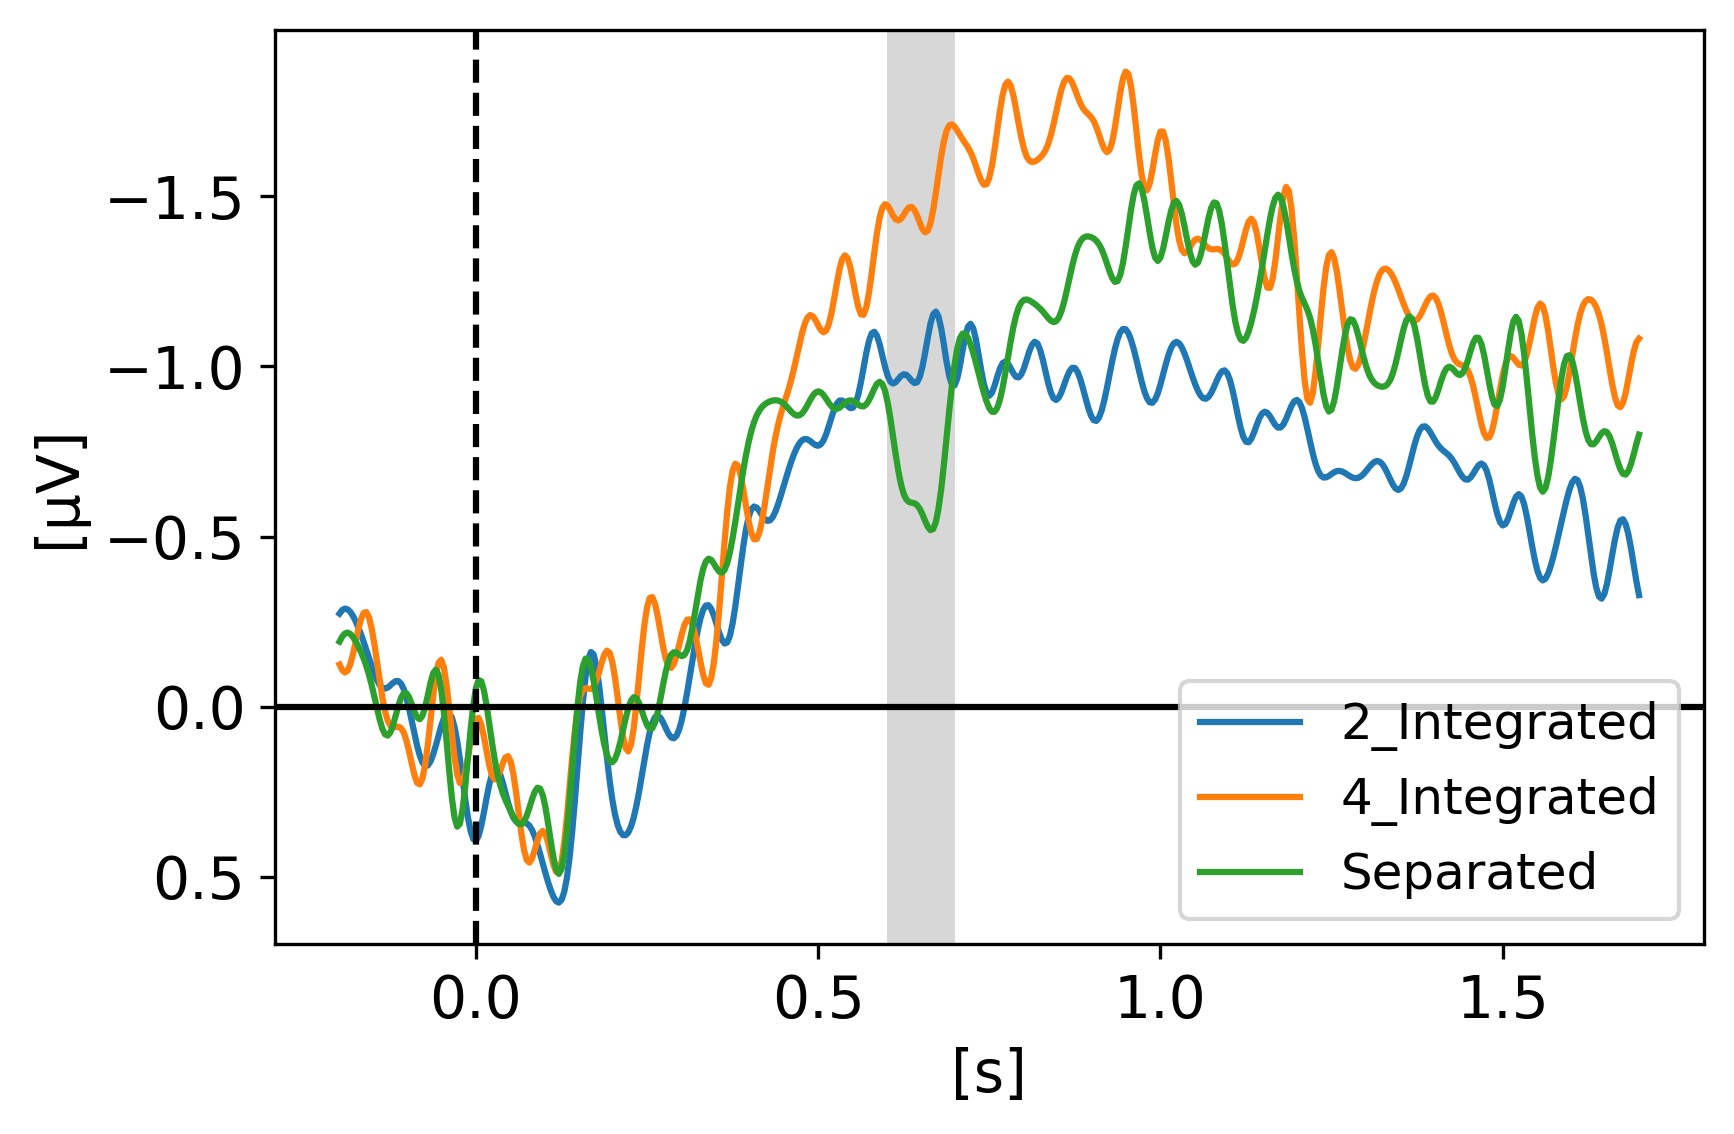

In [17]:
cda_all = dict()

# Get CDA GA
for cond in cda_dict_all[list(cda_dict_all.keys())[0]].keys():
    cda_all[cond] = dict()

    for f in cda_dict_all.keys():        
        perf = 'good'
        
        ldict = cda_dict_all[f][cond]['left']
        rdict = cda_dict_all[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):            
            cda_dict_cur = (cda_dict_all[f][cond]['left'][perf] + cda_dict_all[f][cond]['right'][perf])/2            
            cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))
            
# Plot
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(6, 4), dpi=300)
plt.plot((times), cda_all['2_Integrated'].mean(0) * 1e6, label='2_Integrated')
plt.plot((times), cda_all['4_Integrated'].mean(0) * 1e6, label='4_Integrated')
plt.plot((times), cda_all['Separated'].mean(0) * 1e6, label='Separated')

plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvspan(0.6, 0.7, alpha=0.9, facecolor='lightgray')
plt.gca().invert_yaxis()
plt.rcParams.update({'font.size': 12})
plt.legend(loc=4)
plt.rcParams.update({'font.size': 14})
plt.ylabel('[μV]')
plt.xlabel('[s]')

plt.tight_layout()
fig.savefig("./{}-reprod.png".format(study_id), dpi=300, format='png')

## Save CDA Data

In [4]:
data_pickle = dict()
data_pickle['times'] = times
data_pickle['CDA'] = cda_dict_all
data_pickle['epochs'] = epochs_dict_all
data_pickle['report'] = report
data_pickle['report_perf'] = perf_report_all

with open("{}_clean-20hz.pkl".format(study_id),"wb") as f:
    pickle.dump(data_pickle, f)

## Load CDA Data

In [16]:
with open("{}_clean-20hz.pkl".format(study_id),"rb") as f:
    data_pickle = pickle.load(f)
    
times = data_pickle['times']
cda_dict_all = data_pickle['CDA']
epochs_dict_all = data_pickle['epochs']
report = data_pickle['report']
perf_report_all = data_pickle['report_perf']

len(cda_dict_all)

16

## Analysis - Bad Perf Trials

Text(0.5, 0, '[s]')

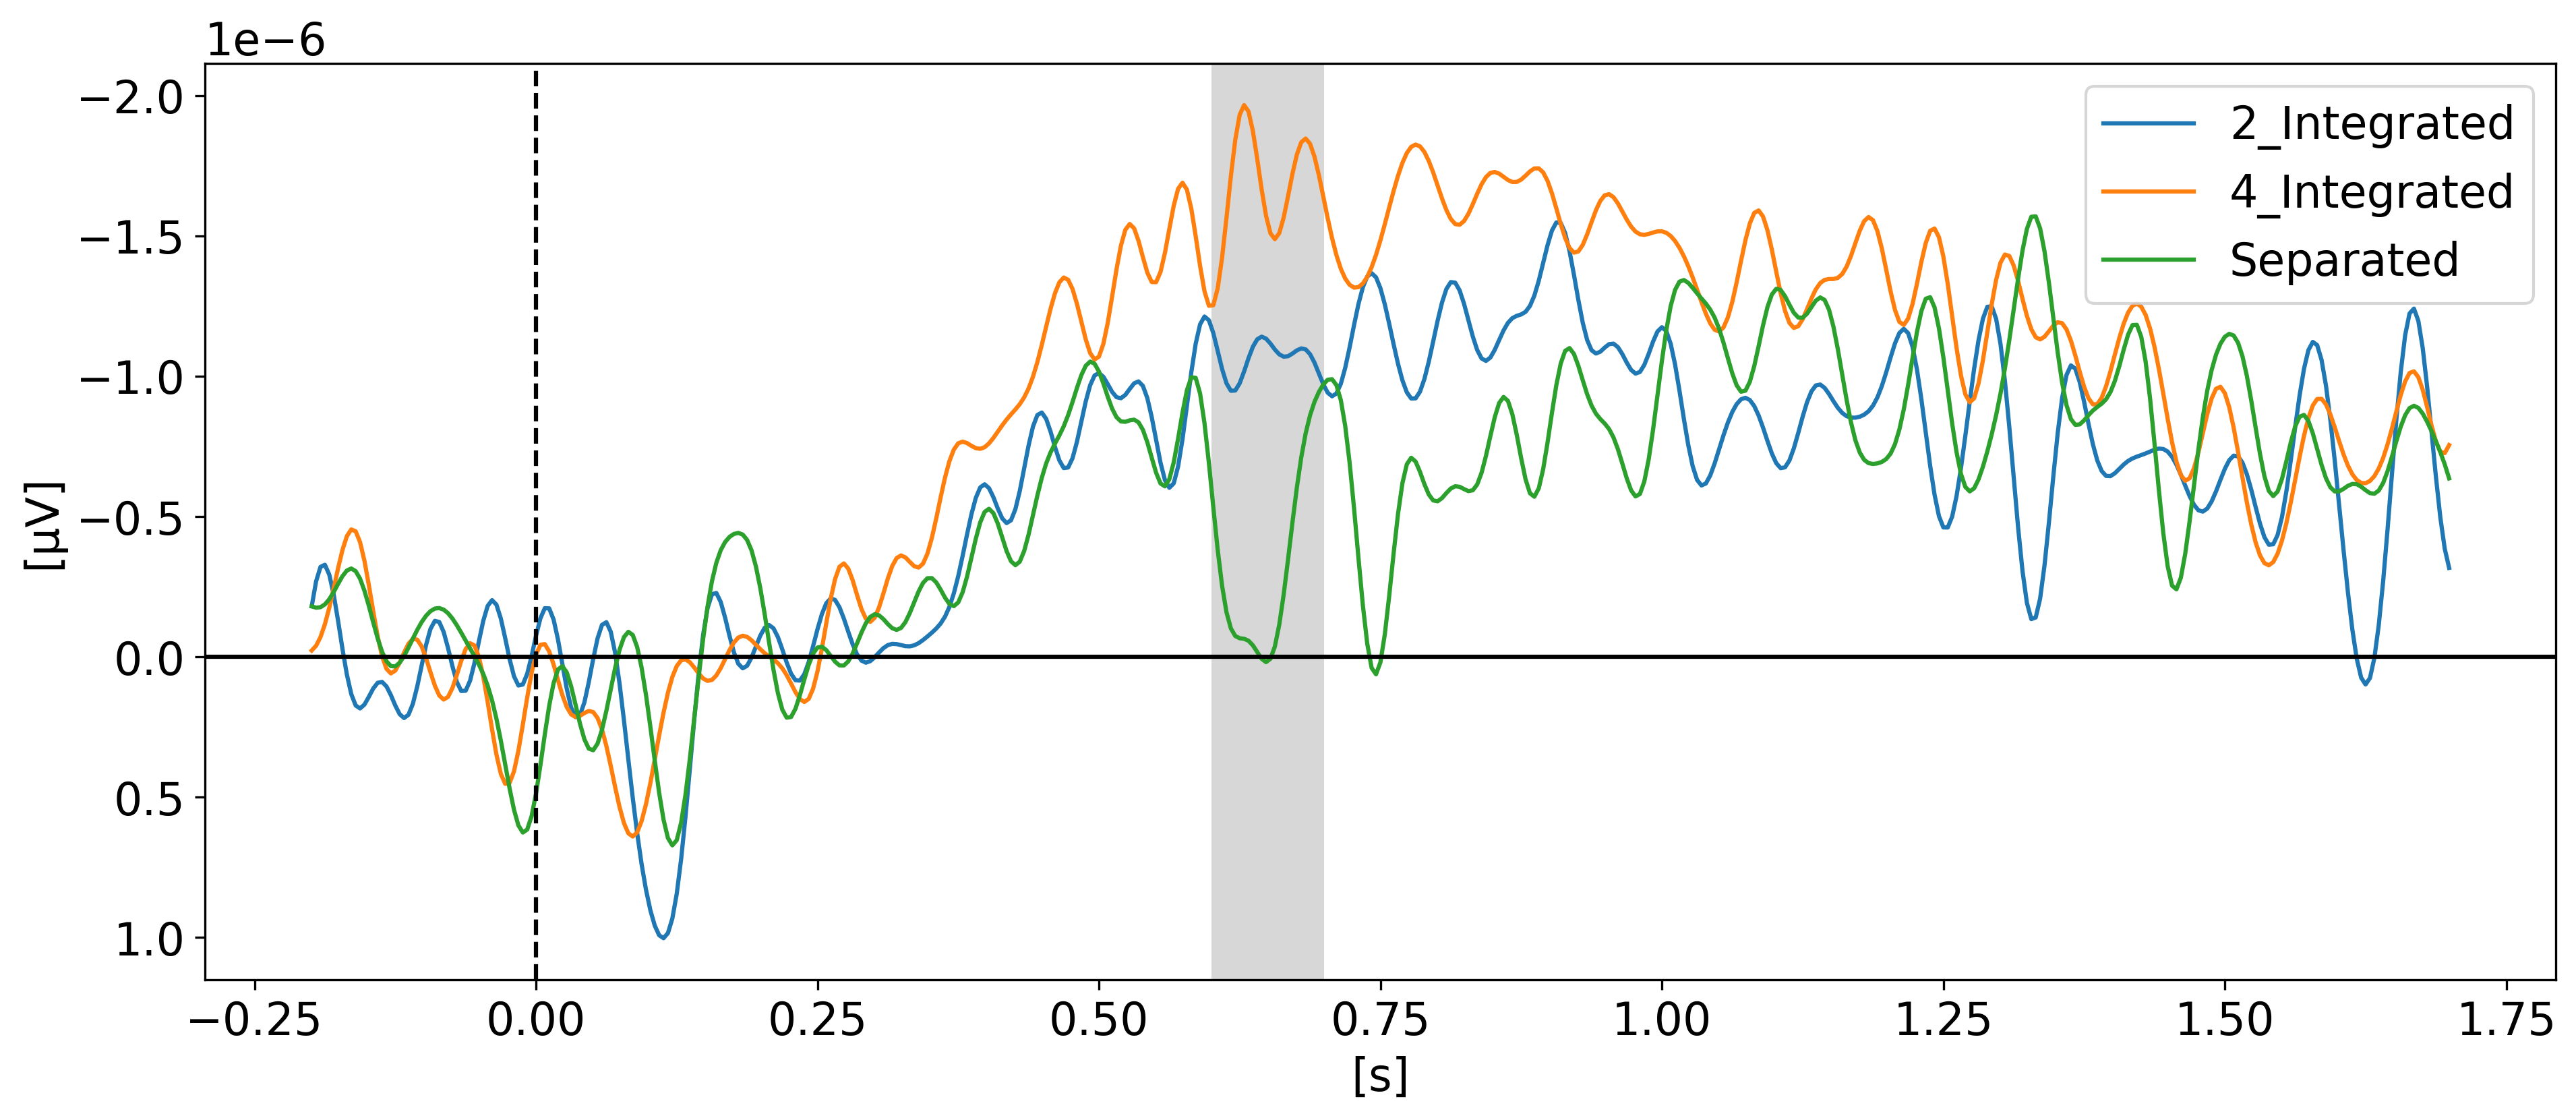

In [18]:
cda_all_bad = dict()

for cond in cda_dict_all[list(cda_dict_all.keys())[0]].keys():
    cda_all_bad[cond] = dict()

    for f in cda_dict_all.keys():
        perf = 'bad'
        
        ldict = cda_dict_all[f][cond]['left']
        rdict = cda_dict_all[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):            
            cda_dict_cur = (cda_dict_all[f][cond]['left'][perf] + cda_dict_all[f][cond]['right'][perf])/2
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur
        elif (perf in ldict.keys() and len(ldict[perf])):
            cda_dict_cur = cda_dict_all[f][cond]['left'][perf]
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur
        elif (perf in rdict.keys() and len(rdict[perf])):
            cda_dict_cur = cda_dict_all[f][cond]['right'][perf]
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur            
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))

# Plot
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(15, 6), dpi=300)
plt.plot((times), cda_all_bad['2_Integrated'].mean(0), label='2_Integrated')
plt.plot((times), cda_all_bad['4_Integrated'].mean(0), label='4_Integrated')
plt.plot((times), cda_all_bad['Separated'].mean(0), label='Separated')

plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvspan(0.6, 0.7, alpha=0.9, facecolor='lightgray')
plt.gca().invert_yaxis()
plt.legend()
plt.ylabel('[μV]')
plt.xlabel('[s]')

#plt.savefig("./{}-bad.png".format(study_id), dpi=300, format='png')

## Analysis - Show Spread per subject

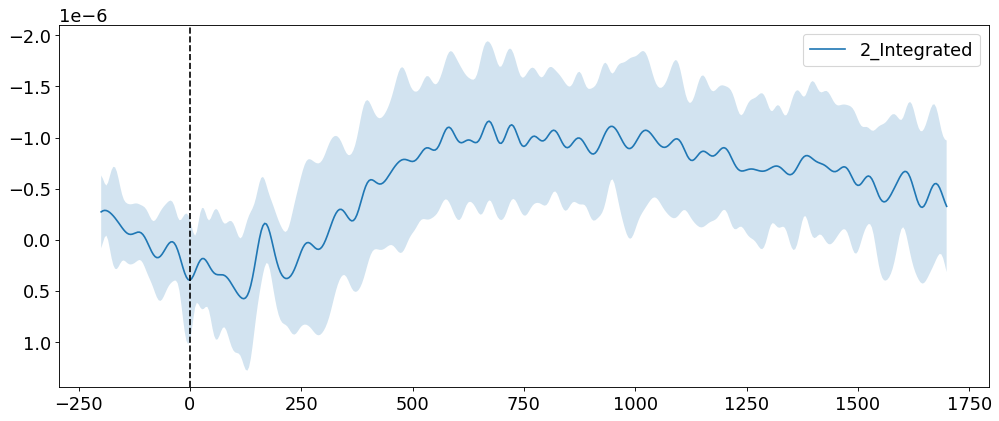

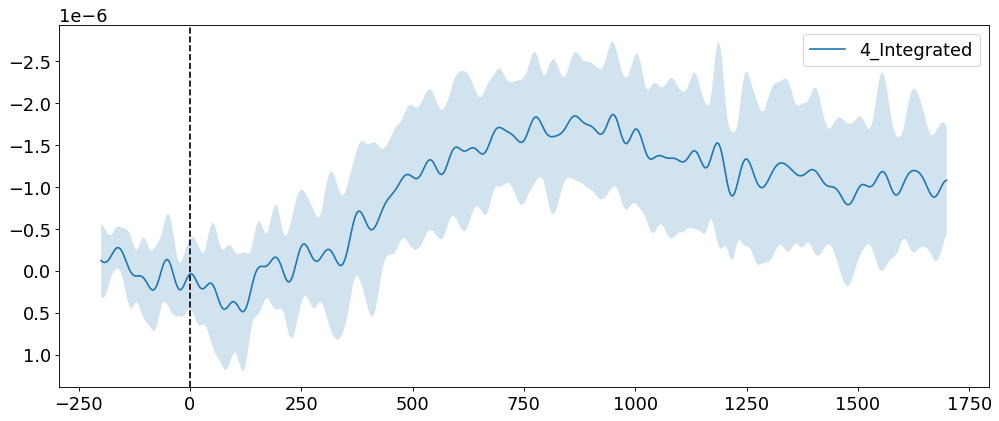

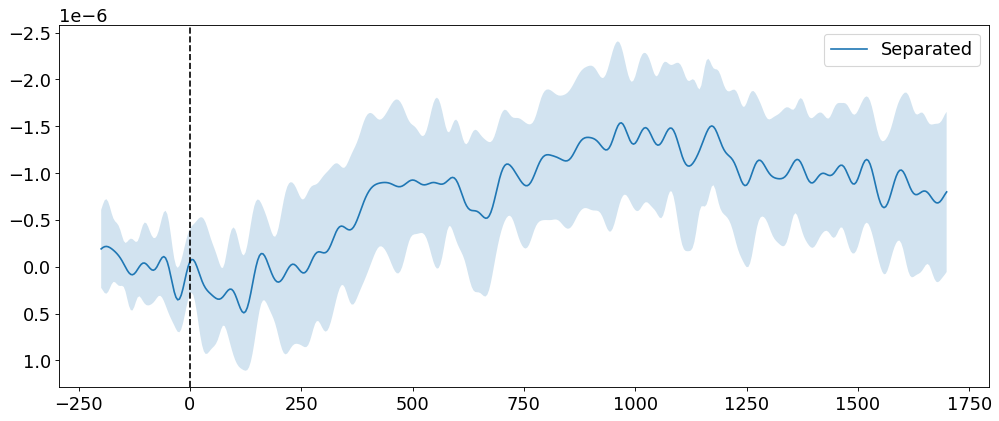

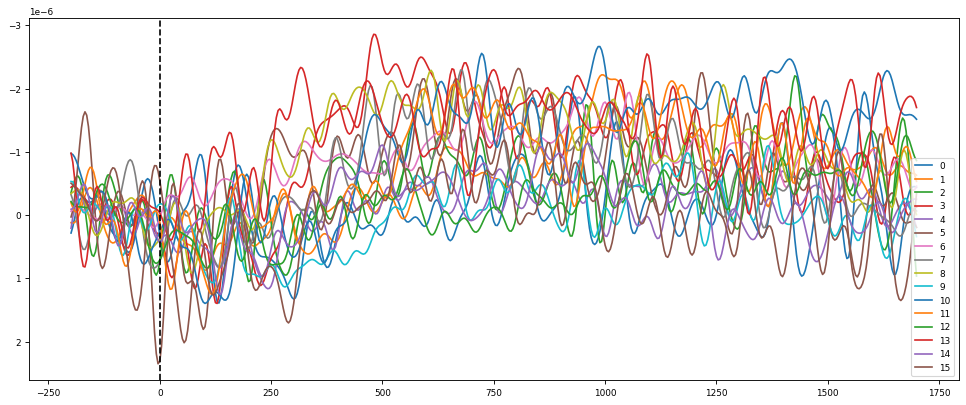

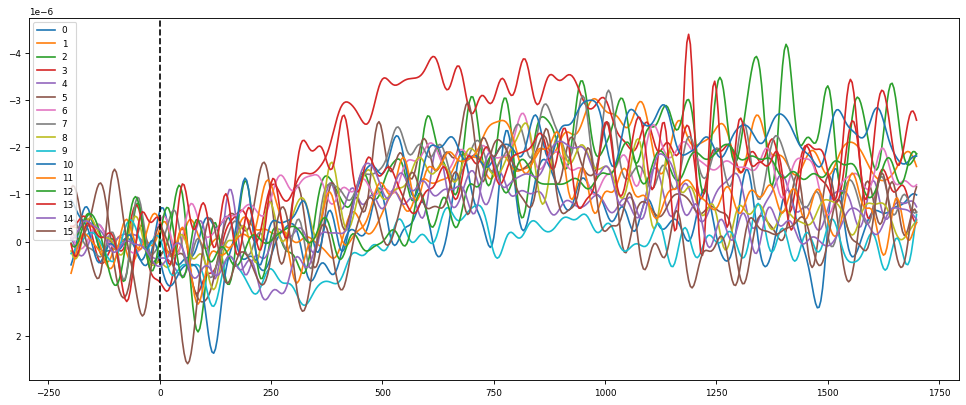

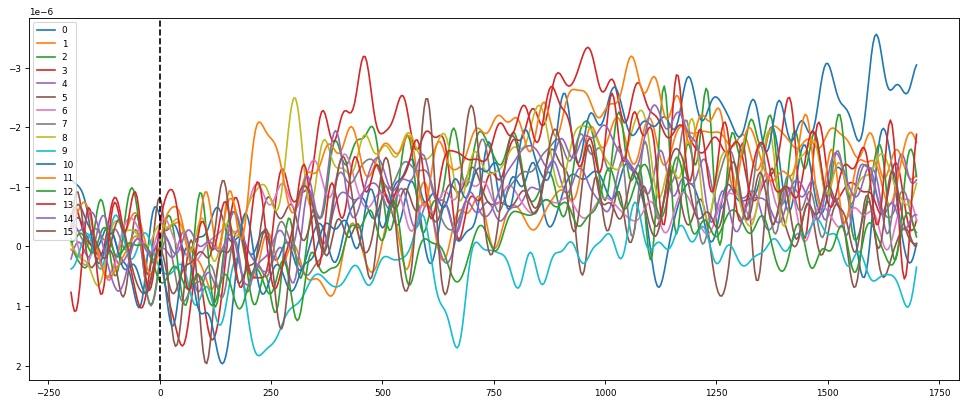

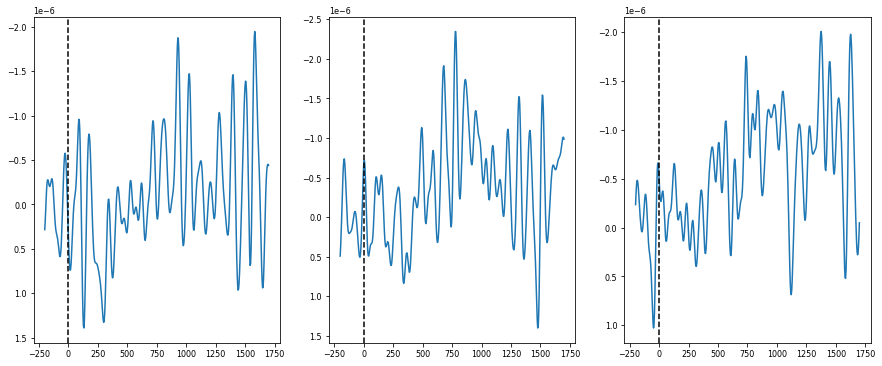

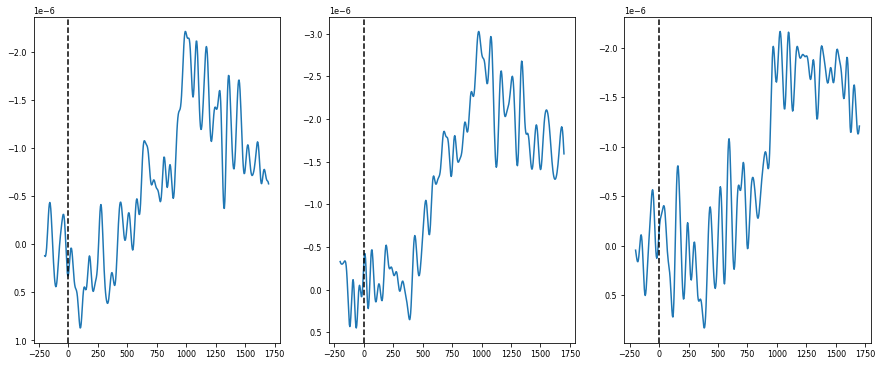

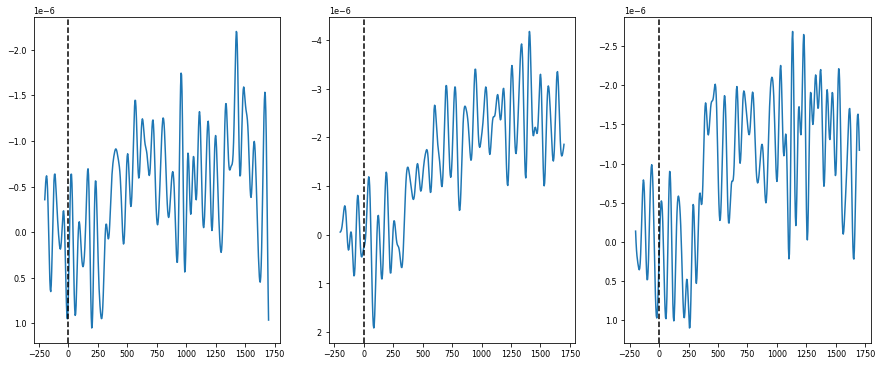

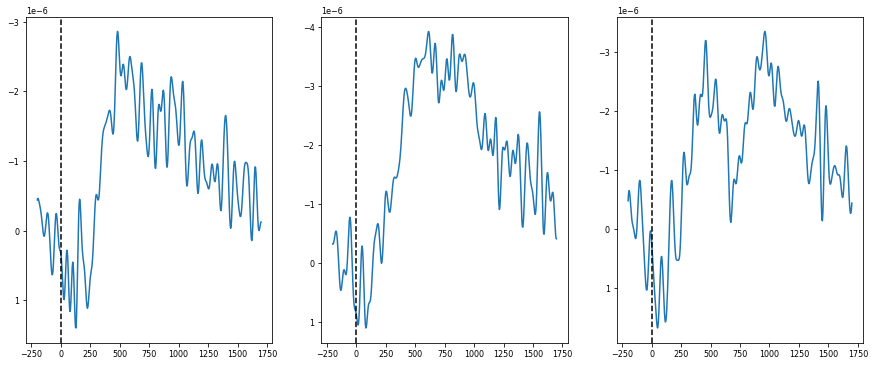

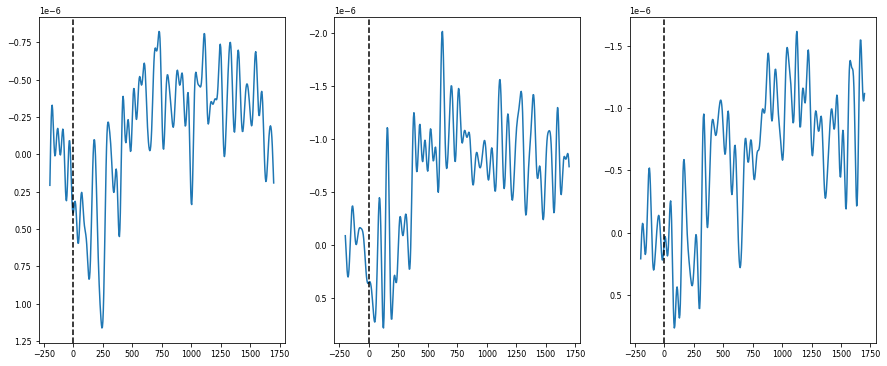

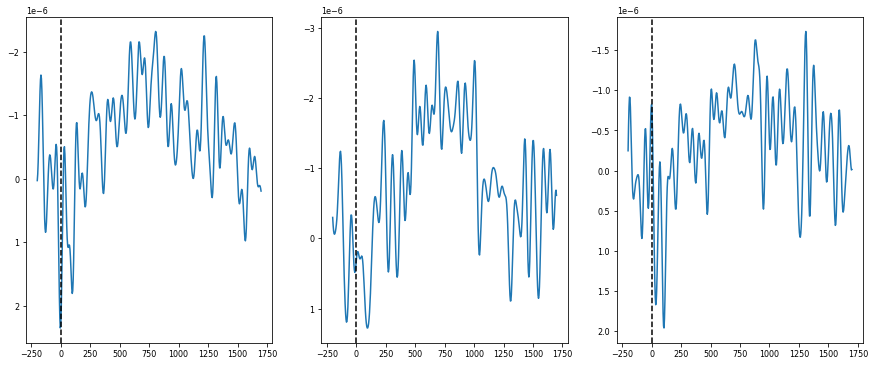

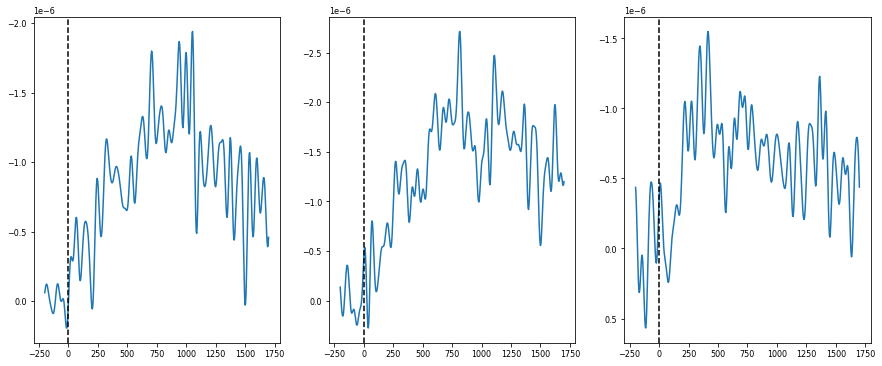

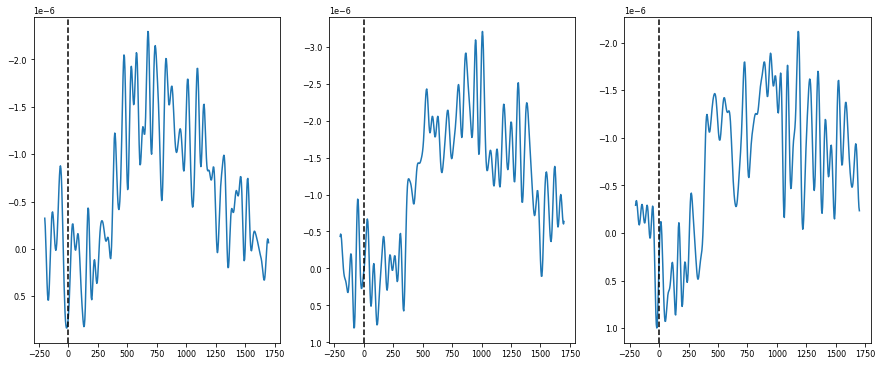

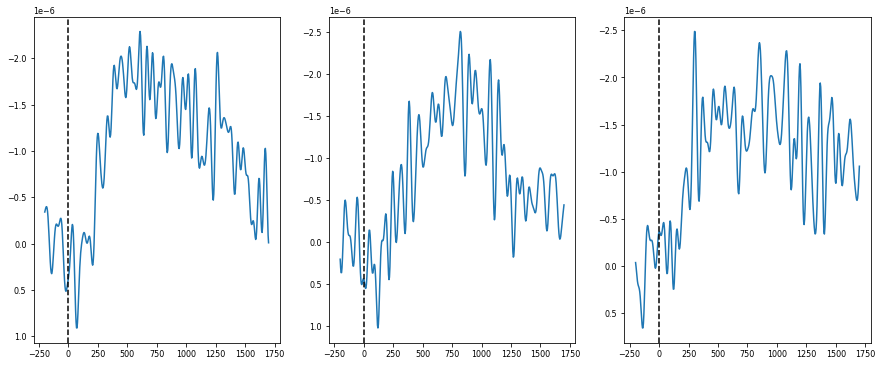

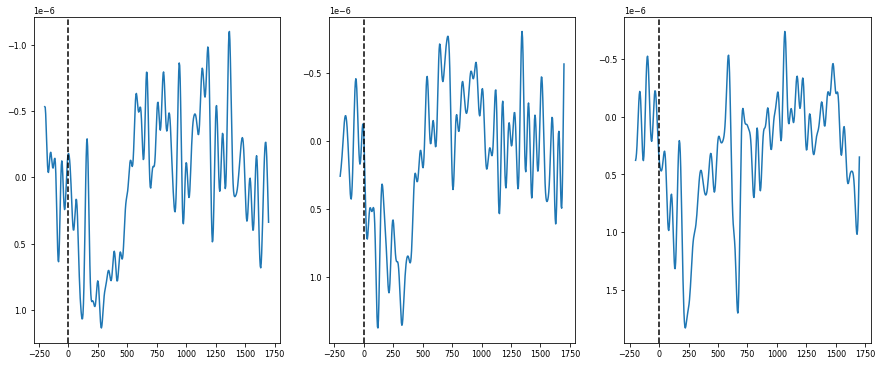

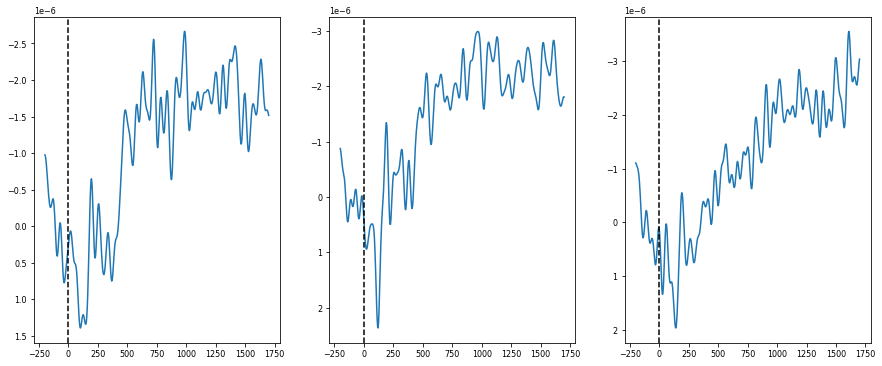

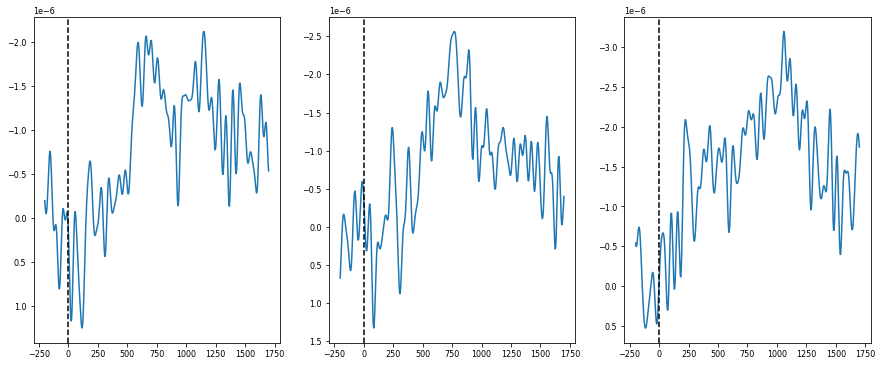

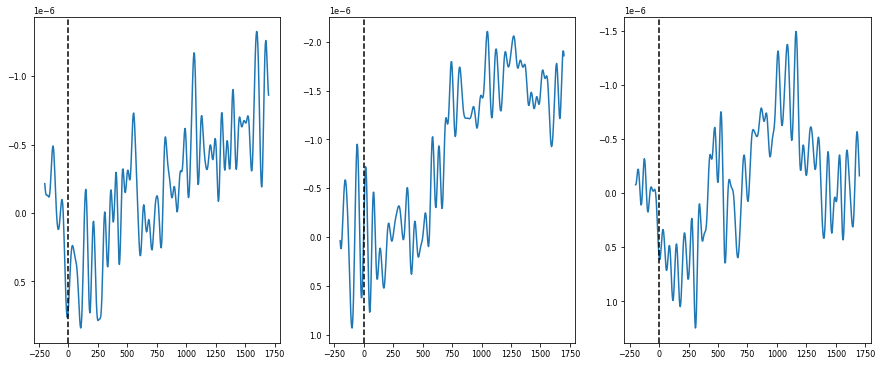

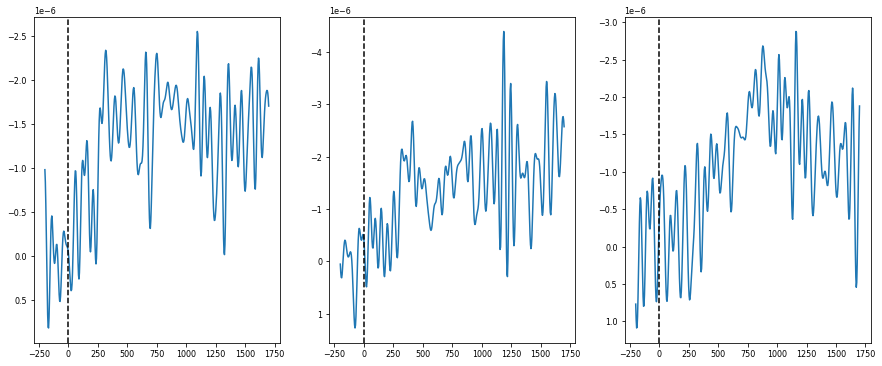

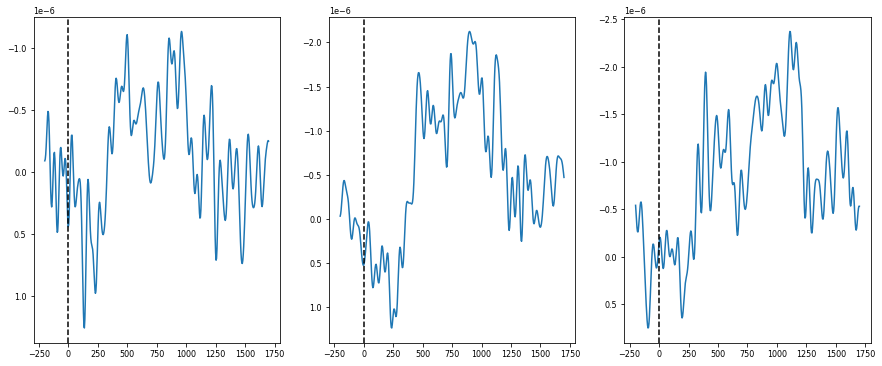

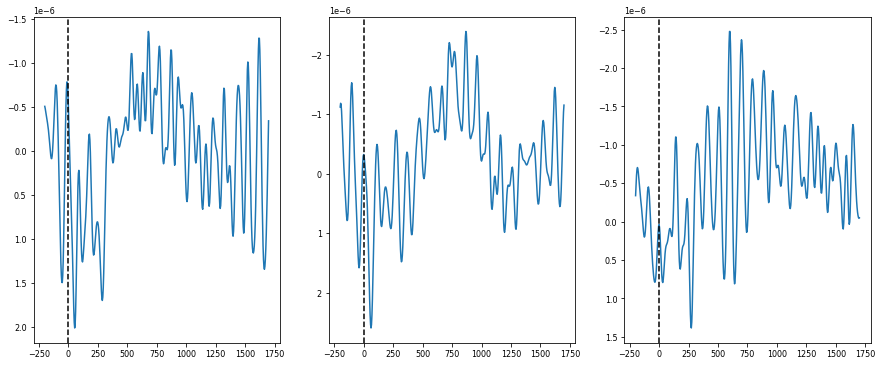

In [26]:
plt.rcParams.update({'font.size': 16})
for cond in conds:
    plt.figure(figsize=(15, 6), dpi=80)
    means = cda_all[cond].mean(0)
    stds = cda_all[cond].std(0)
    plt.plot((times * 1000), means, label=cond)
    plt.fill_between((times * 1000), means-stds,means+stds,alpha=.2)

    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

plt.rcParams.update({'font.size': 8})
for cond in conds:
    plt.figure(figsize=(15, 6), dpi=80)
    for i in range(len(cda_all[cond])):
        plt.plot((times * 1000), cda_all[cond][i,:], label='{}'.format(i))

    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

plt.rcParams.update({'font.size': 8})
#plt.figure(figsize=(15, 6), dpi=80)
for subject in range(len(cda_all[conds[0]])):
    fig, axs = plt.subplots(1, len(conds), figsize=(15,6))
    for i, cond in enumerate(conds):
        axs[i].plot((times * 1000), cda_all[cond][subject,:], label='{}'.format(i))
        axs[i].axvline(x=0, color='k', linestyle='--')
        axs[i].invert_yaxis()
    
#plt.gca().invert_yaxis()
#plt.legend()
plt.show()

## Analysis - Performance Report (CDA per Subject)

In [8]:
report = report.loc[:,~report.columns.duplicated()]

## Subjects: Perf (Good/Bad) vs CDA Amp

Text(0, 0.5, 'Mean CDA Amplitude')

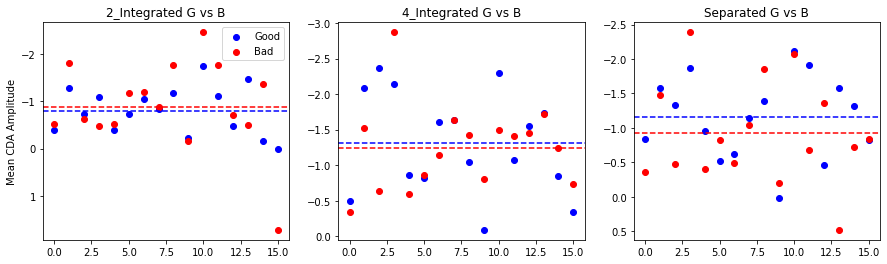

In [9]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,4))

for i, cond in enumerate(conds):
    x = range(len(report['{}-right-good-CDA'.format(cond)]))
    
    # Good
    y = (report['{}-right-good-CDA'.format(cond)] + report['{}-left-good-CDA'.format(cond)]) / 2
    axs[i].scatter(x=x, y=y, color='blue', label='Good')
    axs[i].axhline(y=np.nanmean(y), color='blue', linestyle='--')
    # Bad
    y = (report['{}-right-bad-CDA'.format(cond)] + report['{}-left-bad-CDA'.format(cond)]) / 2
    axs[i].scatter(x=x, y=y, color='red', label='Bad')
    axs[i].axhline(y=np.nanmean(y), color='red', linestyle='--')
    
    axs[i].set_title('{} G vs B'.format(cond))
    axs[i].invert_yaxis()
    
axs[0].legend()
axs[0].set_ylabel('Mean CDA Amplitude')
    

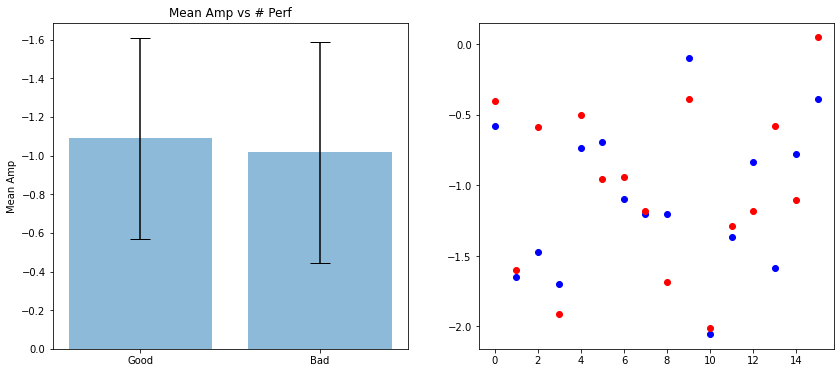

Corr Perf vs CDA Amp: (0.06631713433524491, 0.7183848713437271)


In [10]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Data
goods = np.array(report['good-CDA'])
bads = np.array(report['bad-CDA'])

# Calculate the average
goods_mean = np.nanmean(goods)
bads_mean = np.nanmean(bads)

# Calculate the standard deviation
goods_std = np.nanstd(goods)
bads_std = np.nanstd(bads)

# Define labels, positions, bar heights and error bar heights
labels = ['Good', 'Bad']
x_pos = np.arange(len(labels))
CTEs = [goods_mean, bads_mean]
error = [goods_std, bads_std]

# Build the plot
axs[0].bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
axs[0].set_ylabel('Mean Amp')
axs[0].set_xticks(x_pos)
axs[0].set_xticklabels(labels)
axs[0].set_title('Mean Amp vs # Perf')
axs[0].invert_yaxis()
#ax.yaxis.grid(True)

x = range(len(report['good-CDA']))
axs[1].scatter(x=x, y=report['good-CDA'], color='blue')
axs[1].scatter(x=x, y=report['bad-CDA'], color='red')

#plt.tight_layout()
plt.show()

import scipy
x = []
y = []
for p in perfs:
    for value in report['{}-CDA'.format(p)]:
        if p == 'good':
            x.append(1)
        else:
            x.append(2)
        y.append(value)

print('Corr Perf vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

## Subjects: Condition vs CDA Amp

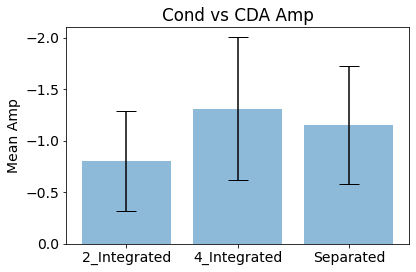

In [11]:
plt.rcParams.update({'font.size': 14})

data_conds = dict()
for cond in conds:
    data_conds[cond] = dict()
    data_conds[cond]['data'] = np.array(report['{}-good-CDA'.format(cond)])
    data_conds[cond]['mean'] = np.nanmean(data_conds[cond]['data'])
    data_conds[cond]['std'] = np.nanstd(data_conds[cond]['data'])
    
labels = conds
x_pos = np.arange(len(labels))
CTEs = [data_conds[cond]['mean'] for cond in conds]
error = [data_conds[cond]['std'] for cond in conds]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean Amp')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Cond vs CDA Amp')
ax.invert_yaxis()
#ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Pearson's Correlation
import scipy
x = []
y = []
set_sizes = conds
for i, ss in enumerate(set_sizes):
    for value in report['{}-good-CDA'.format(ss)]:
        x.append(i)
        y.append(value)

print('Corr Cond vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

Corr Cond vs CDA Amp: (-0.22835349135717953, 0.11850440297266042)


## Subjects: Side (Left/Right) vs CDA Amp

Corr Side vs CDA Amp: (0.045817743241687775, 0.8033584345646627)


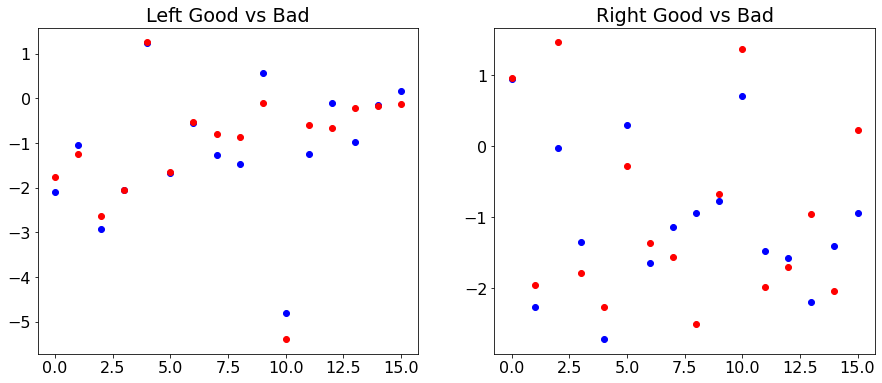

In [13]:
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(1, 2, figsize=(15,6))

x = range(len(report['left-good-CDA']))
axs[0].scatter(x=x, y=report['left-good-CDA'], color='blue')
x = range(len(report['left-bad-CDA']))
axs[0].scatter(x=x, y=report['left-bad-CDA'], color='red')
axs[0].set_title('Left Good vs Bad')

x = range(len(report['right-good-CDA']))
axs[1].scatter(x=x, y=report['right-good-CDA'], color='blue')
x = range(len(report['right-bad-CDA']))
axs[1].scatter(x=x, y=report['right-bad-CDA'], color='red')
axs[1].set_title('Right Good vs Bad')

x = []
y = []
for i, side in enumerate(sides):
    for value in report['{}-good-CDA'.format(side)]:
        x.append(i)
        y.append(value)

print('Corr Side vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

## Subjects: Accuracy / Performance vs CDA Amp

Corr Perf Acc ~ 2_Integrated: (-0.48599456359193005, 0.05630873571833355)
Corr Perf Acc ~ 4_Integrated: (-0.37226739179231916, 0.15562970046349048)
Corr Perf Acc ~ Separated: (-0.5552937660484715, 0.025550605544387508)


Text(0, 0.5, 'CDA Mean Amp')

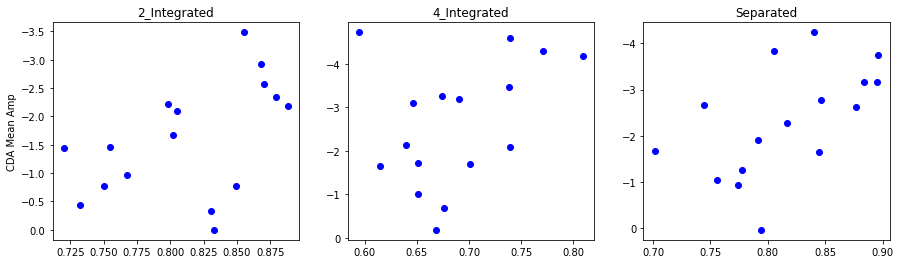

In [14]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,4))

for i, cond in enumerate(conds):
    goods = (report['{}-left-good'.format(cond)] + report['{}-right-good'.format(cond)])/2
    bads = (report['{}-left-bad'.format(cond)] + report['{}-right-bad'.format(cond)])/2
    x = goods / (goods + bads)
    y = report['{}-left-good-CDA'.format(cond)] + report['{}-right-good-CDA'.format(cond)]
    axs[i].scatter(x=x, y=y, color='blue')
    axs[i].invert_yaxis()
    axs[i].set_title('{}'.format(cond))
    
    print('Corr Perf Acc ~ {}: {}'.format(cond, scipy.stats.pearsonr(x,y)))

axs[0].set_ylabel('CDA Mean Amp')

## Trials: Conditions vs Amp

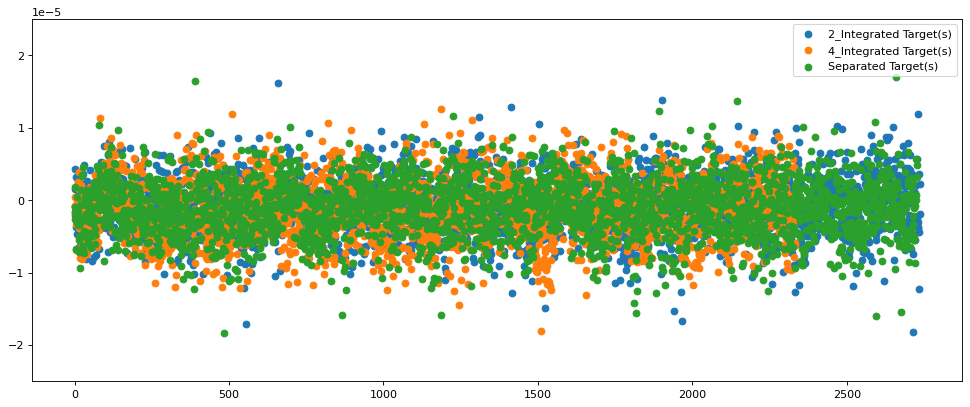

In [15]:
plt.figure(figsize=(15, 6), dpi=80)

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for side in sides:
            for value in perf_report_all[f][cond][side]['good']:
                y1.append(value)
    x1 = range(len(y1))

    plt.scatter(x=x1, y=y1, label='{} Target(s)'.format(cond))

plt.ylim(-2.5*1e-5,2.5*1e-5)
plt.legend()
plt.show()

## Trials: Good vs Bad

Cond = 2_Integrated Targets: 2738 Good Perf Trials vs 619 Bad Perf Trials, with 0 outliers on graph.
Cond = 4_Integrated Targets: 2335 Good Perf Trials vs 1053 Bad Perf Trials, with 2 outliers on graph.
Cond = Separated Targets: 2728 Good Perf Trials vs 605 Bad Perf Trials, with 1 outliers on graph.


Text(0, 0.5, 'CDA mean amplitude')

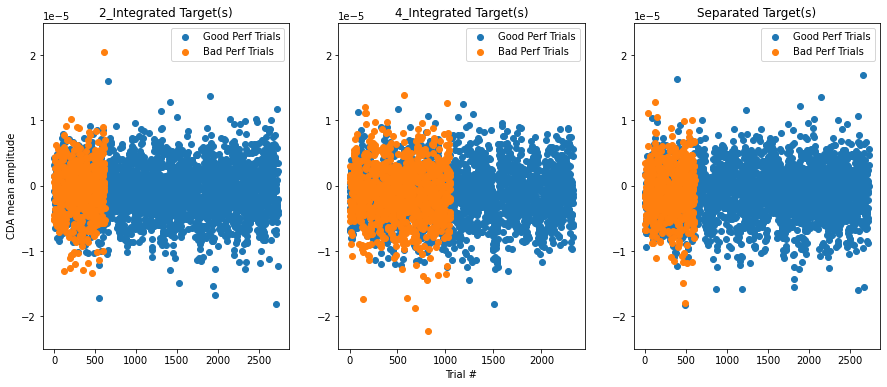

In [16]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,6))

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['left']['good']:
            y1.append(value)
        for value in perf_report_all[f][cond]['right']['good']:
            y1.append(value)
    x1 = range(len(y1))

    y2 = []
    for f in perf_report_all.keys():
        if 'bad' in perf_report_all[f][cond]['left'].keys():
            for value in perf_report_all[f][cond]['left']['bad']:
                y2.append(value)
        if 'bad' in perf_report_all[f][cond]['right'].keys():
            for value in perf_report_all[f][cond]['right']['bad']:
                y2.append(value)
    x2 = range(len(y2))

    axs[i].scatter(x=x1, y=y1, label='Good Perf Trials')
    axs[i].scatter(x=x2, y=y2, label='Bad Perf Trials')
    axs[i].legend()
    axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)
    axs[i].set_title('{} Target(s)'.format(cond))

    nb_outliers = len([val for val in (y1 + y2) if ((val*1e5) > 2.5) or ((val*1e5) < -2.5)])
    print('Cond = {} Targets: {} Good Perf Trials vs {} Bad Perf Trials, with {} outliers on graph.'.format(cond, len(y1), len(y2), nb_outliers))

axs[1].set_xlabel('Trial #')
axs[0].set_ylabel('CDA mean amplitude')
#fig.tight_layout(pad=1.0)

## Trials: Left vs Right

Cond = 2_Integrated Targets: 1382 Good Left Trials vs 1356 Good Right Trials, with 0 outliers on graph
Cond = 4_Integrated Targets: 1134 Good Left Trials vs 1201 Good Right Trials, with 2 outliers on graph
Cond = Separated Targets: 1339 Good Left Trials vs 1389 Good Right Trials, with 1 outliers on graph


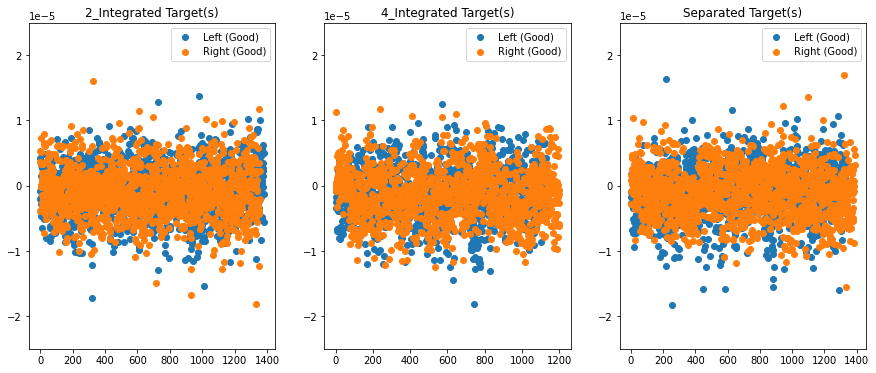

In [17]:
fig, axs = plt.subplots(1, len(conds), figsize=(15,6))

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['left']['good']:
            y1.append(value)
    x1 = range(len(y1))

    y2 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['right']['good']:
            y2.append(value)
    x2 = range(len(y2))

    axs[i].scatter(x=x1, y=y1, label='Left (Good)')
    axs[i].scatter(x=x2, y=y2, label='Right (Good)')
    axs[i].legend()
    axs[i].set_title('{} Target(s)'.format(cond))
    axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)

    nb_outliers = len([val for val in (y1 + y2) if ((val*1e5) > 2.5) or ((val*1e5) < -2.5)])
    print('Cond = {} Targets: {} Good Left Trials vs {} Good Right Trials, with {} outliers on graph'.format(cond, len(y1), len(y2), nb_outliers))
        

## Top 5 vs Low 5 Perf vs CDA -- Subject Variability

In [7]:
report['perf'] = [0] * len(report)

for id in report.index:
    report.at[id, 'perf'] = int(report.at[id, 'good'] / (report.at[id, 'good'] + report.at[id, 'bad']) * 100)

top5 = (report.sort_values(by=['perf'], ascending=False)).index[0:5]
low5 = (report.sort_values(by=['perf'], ascending=False)).index[-5:] # Exception here to exclude the very last
print('Top 5: {}'.format(top5))
print('Low 5: {}'.format(low5))

report_sorted = report.sort_values(by=['perf'], ascending=False)
report_sorted

Top 5: Index(['515.bdf', '517.bdf', '504.bdf', '506.bdf', '505.bdf'], dtype='object')
Low 5: Index(['507.bdf', '510.bdf', '502.bdf', '514.bdf', '501.bdf'], dtype='object')


2_Integrated 4_Integrated Separated left right good  bad  \
515.bdf          224          210       238  328   344  578   94   
517.bdf          214          236       222  315   357  571  101   
504.bdf          212          218       242  352   320  559  113   
506.bdf          223          234       215  348   324  551  121   
505.bdf          242          211       219  319   353  547  125   
509.bdf          218          234       220  313   359  538  134   
508.bdf          191          207       193  312   279  462  129   
503.bdf          239          212       221  326   346  516  156   
512.bdf          237          233       202  328   344  512  160   
516.bdf          226          226       220  340   332  509  163   
511.bdf          208          222       242  307   365  503  169   
507.bdf          224          220       228  348   324  492  180   
510.bdf          237          209       226  366   306  492  180   
502.bdf          220          223       229  341   331  476  196   
514.bdf          220          241       211  331   341  470  202   
501.bdf          218          217       188  319   304  426  197   

        2_Integrated-left 2_Integrated-left-CDA 2_Integrated-left-good  ...  \
515.bdf               105                     0                     91  ...   
517.bdf               100                     0                     87  ...   
504.bdf               101                     0                     86  ...   
506.bdf               116                     0                    106  ...   
505.bdf               123                     0                    110  ...   
509.bdf                96                     0                     76  ...   
508.bdf               111                     0                     94  ...   
503.bdf               115                     0                     94  ...   
512.bdf               114                     0                     92  ...   
516.bdf               134                     0                    106  ...   
511.bdf                98                     0                     73  ...   
507.bdf               110                     0                     82  ...   
510.bdf               128                     0                     94  ...   
502.bdf               114                     0                     87  ...   
514.bdf               112                     0                     87  ...   
501.bdf               118                     0                     86  ...   

        Separated-right-good-CDA right-good-CDA Separated-right-bad  \
515.bdf                -1.720047      -2.261183                  13   
517.bdf                -1.385189      -1.352952                  10   
504.bdf                 -1.20801      -2.197868                  10   
506.bdf                -1.241515      -0.946185                  21   
505.bdf                 0.229013       0.706429                  16   
509.bdf                 -2.00324      -1.410206                  12   
508.bdf                -1.495902      -0.945147                  14   
503.bdf                -3.417124      -2.717071                  22   
512.bdf                -0.634589      -1.134993                  16   
516.bdf                 -0.53916      -1.645759                  26   
511.bdf                -1.415407      -1.479878                  23   
507.bdf                -0.654125      -0.772377                  23   
510.bdf                -1.477022      -1.570402                  19   
502.bdf                 0.428106       0.294648                  21   
514.bdf                 0.520788       0.945304                  32   
501.bdf                 0.433412      -0.033373                  18   

        Separated-right-bad-CDA right-bad-CDA checksum notes  good-CDA  \
515.bdf               -2.074223     -1.954619        0     0 -1.650430   
517.bdf               -1.588518     -1.781052        1     0 -1.700785   
504.bdf                1.300935     -0.950475        1     0 -1.588438   
506

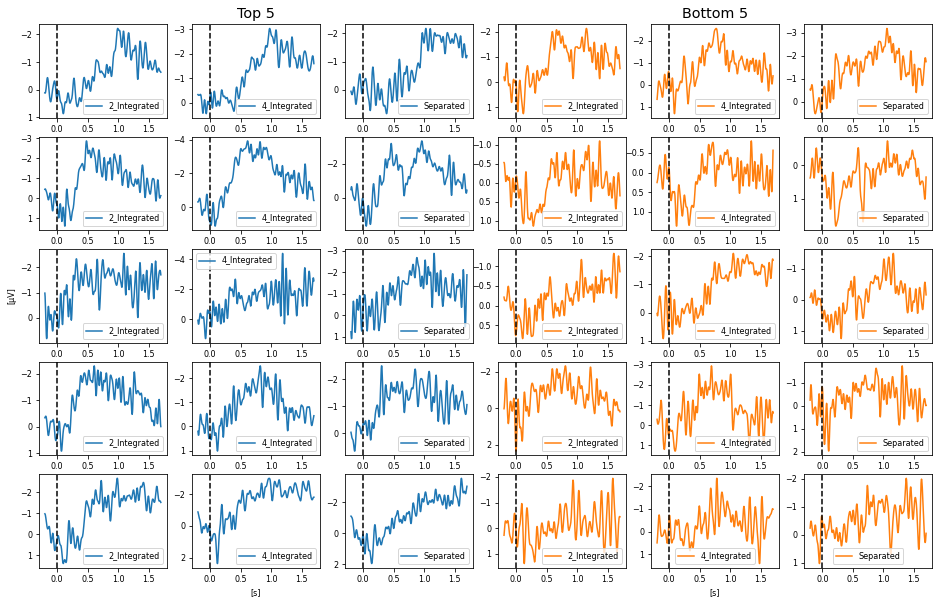

In [6]:
#plt.rcParams.update({'font.size': 8})

top5low5 = list(top5.values) + list(low5.values)
fig, axs = plt.subplots(5, 6, figsize=(16,10))
for i, participant in enumerate(top5low5):
    cur_cda = cda_dict_all[participant]

    if i >= 5:
        offset = 3
        pcolor = 'C1'
    else:
        offset = 0
        pcolor = 'C0'
        
    for j, cond in enumerate(conds):
        axs[i%5,j+offset].plot((times), (cur_cda[cond]['left']['good'] + cur_cda[cond]['right']['good'])/2 *1e6, color=pcolor, label='{}'.format(cond))
        axs[i%5,j+offset].axvline(x=0, color='k', linestyle='--')
        #axs[0].set_ylim((-6,4))
        axs[i%5,j+offset].invert_yaxis()
        axs[i%5,j+offset].legend()

# Hardcode some labels
plt.rcParams.update({'font.size': 12})
axs[0,1].set_title('Top 5')
axs[0,4].set_title('Bottom 5')
plt.rcParams.update({'font.size': 8})
axs[4,1].set_xlabel('[s]')
axs[4,4].set_xlabel('[s]')
axs[2,0].set_ylabel('[μV]')

plt.savefig("./{}_top5low5.png".format(study_id), dpi=300, format='png')
plt.show()